# 03 - Data Analysis & Insights

This notebook generates comprehensive insights from the processed social ads data.

## What we'll analyze:
1. **Purchase Patterns**: Overall conversion rates and trends
2. **Demographic Analysis**: Age and income segment performance
3. **Statistical Analysis**: Correlations and significance testing
4. **Business Insights**: Actionable recommendations for marketing strategy

**Prerequisites**: 
- Complete `01_data_exploration.ipynb` 
- Complete `02_etl_pipeline.ipynb` (data must be in database)

Let's generate meaningful insights for the social media advertising campaign!

In [1]:
# Setup and imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Add src to path
sys.path.append('../src')
from config import SQLITE_URL
from sqlalchemy import create_engine

# Create database engine
engine = create_engine(SQLITE_URL)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

print("📦 Libraries imported successfully!")
print(f"🔗 Connecting to database: {SQLITE_URL}")

📦 Libraries imported successfully!
🔗 Connecting to database: sqlite:////Users/tharushavihanga/Developer/social-ads-etl/data/processed/social_ads.db


In [2]:
# Load processed data from database
query = "SELECT * FROM social_ads"
df = pd.read_sql_query(query, engine)

print(f"📊 Loaded {len(df)} records from database")
print(f"📝 Columns: {list(df.columns)}")

# Check for missing columns
expected_columns = ['age', 'estimated_salary', 'purchased', 'age_group', 'salary_bracket', 'created_at', 'updated_at']
missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    print(f"⚠️ Missing columns: {missing_columns}")
    print("🔧 Running ETL pipeline may be needed to fix timestamp columns")
else:
    print("✅ All expected columns present")

# Check for missing values
null_counts = df.isnull().sum()
if null_counts.sum() > 0:
    print(f"⚠️ Missing values found:")
    for col, count in null_counts[null_counts > 0].items():
        print(f"   • {col}: {count} missing values")
else:
    print("✅ No missing values detected")

print(f"📈 Purchase rate: {df['purchased'].mean():.1%}")

# Quick overview
print(f"\n🔍 Data overview:")
df.head()

📊 Loaded 367 records from database
📝 Columns: ['id', 'age', 'estimated_salary', 'purchased', 'age_group', 'salary_bracket', 'created_at', 'updated_at']
✅ All expected columns present
✅ No missing values detected
📈 Purchase rate: 37.6%

🔍 Data overview:


,id,age,estimated_salary,purchased,age_group,salary_bracket,created_at,updated_at
0,1,19,19000.0,0,Young (18-24),Low (<30K),2025-07-20 04:15:49.474422,2025-07-20 04:15:49.474422
1,2,35,20000.0,0,Middle Age (35-44),Low (<30K),2025-07-20 04:15:49.474422,2025-07-20 04:15:49.474422
2,3,26,43000.0,0,Adult (25-34),Medium (30K-60K),2025-07-20 04:15:49.474422,2025-07-20 04:15:49.474422
3,4,27,57000.0,0,Adult (25-34),Medium (30K-60K),2025-07-20 04:15:49.474422,2025-07-20 04:15:49.474422
4,5,19,76000.0,0,Young (18-24),High (60K-100K),2025-07-20 04:15:49.474422,2025-07-20 04:15:49.474422


## 📊 Overall Performance Analysis

🎯 KEY PERFORMANCE METRICS
Total Customers: 367
Total Purchases: 138
Overall Purchase Rate: 37.6%
Average Customer Age: 37.7 years
Average Customer Salary: $70,719


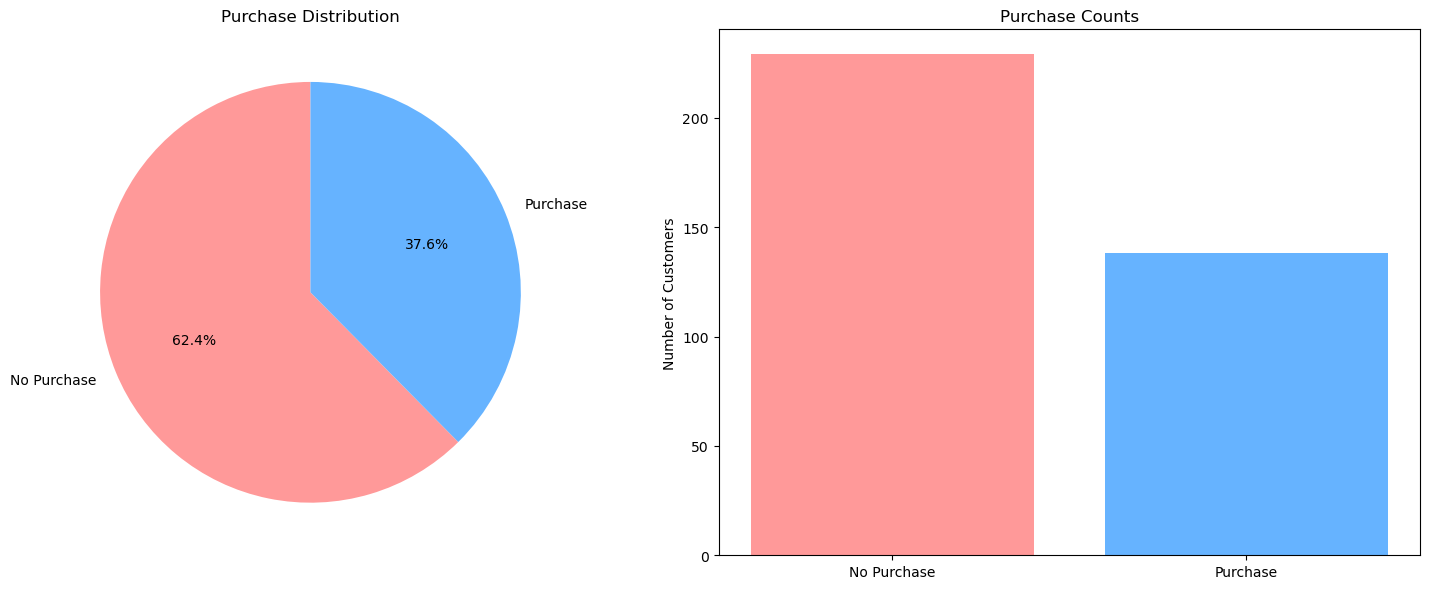


💡 Key Insight: 37.6% of customers made a purchase after seeing the ad


In [3]:
# Key Performance Metrics
total_customers = len(df)
total_purchases = df['purchased'].sum()
purchase_rate = df['purchased'].mean()
avg_age = df['age'].mean()
avg_salary = df['estimated_salary'].mean()

print("🎯 KEY PERFORMANCE METRICS")
print("=" * 50)
print(f"Total Customers: {total_customers:,}")
print(f"Total Purchases: {total_purchases:,}")
print(f"Overall Purchase Rate: {purchase_rate:.1%}")
print(f"Average Customer Age: {avg_age:.1f} years")
print(f"Average Customer Salary: ${avg_salary:,.0f}")

# Purchase distribution visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Purchase rate pie chart
purchase_counts = df['purchased'].value_counts()
labels = ['No Purchase', 'Purchase']
sizes = [purchase_counts[0], purchase_counts[1]]
colors = ['#ff9999', '#66b3ff']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Purchase Distribution')

# Purchase counts bar chart
ax2.bar(labels, sizes, color=colors)
ax2.set_title('Purchase Counts')
ax2.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insight: {purchase_rate:.1%} of customers made a purchase after seeing the ad")

## 👥 Demographic Analysis

👥 PURCHASE RATE BY AGE GROUP
                    Total_Customers  Total_Purchases  Purchase_Rate  \
age_group                                                             
Senior (45+)                    106               90          0.849   
Middle Age (35-44)              125               34          0.272   
Adult (25-34)                    95               14          0.147   
Young (18-24)                    41                0          0.000   

                    Avg_Salary  
age_group                       
Senior (45+)         73575.472  
Middle Age (35-44)   74712.000  
Adult (25-34)        69789.474  
Young (18-24)        53317.073  


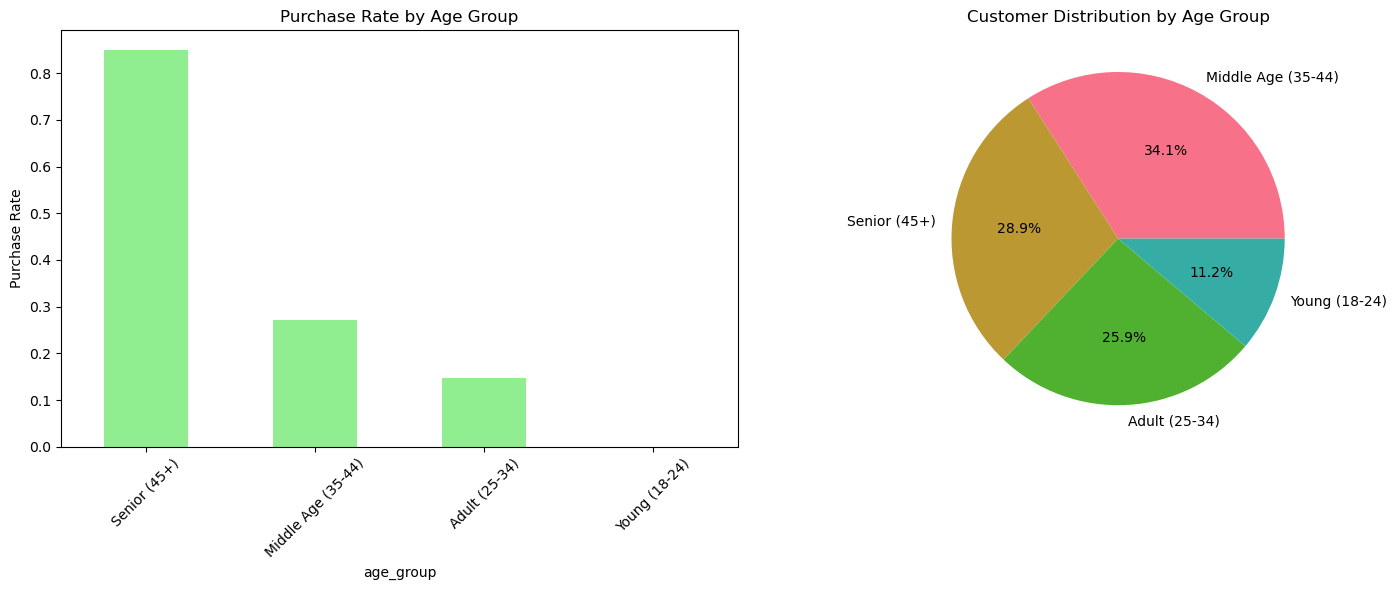


🏆 Best performing age group: Senior (45+) (84.9% purchase rate)


In [4]:
# Age Group Analysis
age_group_stats = df.groupby('age_group').agg({
    'purchased': ['count', 'sum', 'mean'],
    'estimated_salary': 'mean'
}).round(3)

age_group_stats.columns = ['Total_Customers', 'Total_Purchases', 'Purchase_Rate', 'Avg_Salary']
age_group_stats = age_group_stats.sort_values('Purchase_Rate', ascending=False)

print("👥 PURCHASE RATE BY AGE GROUP")
print("=" * 40)
print(age_group_stats)

# Visualize age group performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Purchase rate by age group
age_group_stats['Purchase_Rate'].plot(kind='bar', ax=ax1, color='lightgreen')
ax1.set_title('Purchase Rate by Age Group')
ax1.set_ylabel('Purchase Rate')
ax1.tick_params(axis='x', rotation=45)

# Customer distribution by age group
age_group_counts = df['age_group'].value_counts()
ax2.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%')
ax2.set_title('Customer Distribution by Age Group')

plt.tight_layout()
plt.show()

# Identify best performing age group
best_age_group = age_group_stats.index[0]
best_age_rate = age_group_stats.iloc[0]['Purchase_Rate']
print(f"\n🏆 Best performing age group: {best_age_group} ({best_age_rate:.1%} purchase rate)")

## 📈 Statistical Analysis

🔗 CORRELATION ANALYSIS
Correlation matrix:
                    age  estimated_salary  purchased
age               1.000             0.168      0.626
estimated_salary  0.168             1.000      0.376
purchased         0.626             0.376      1.000


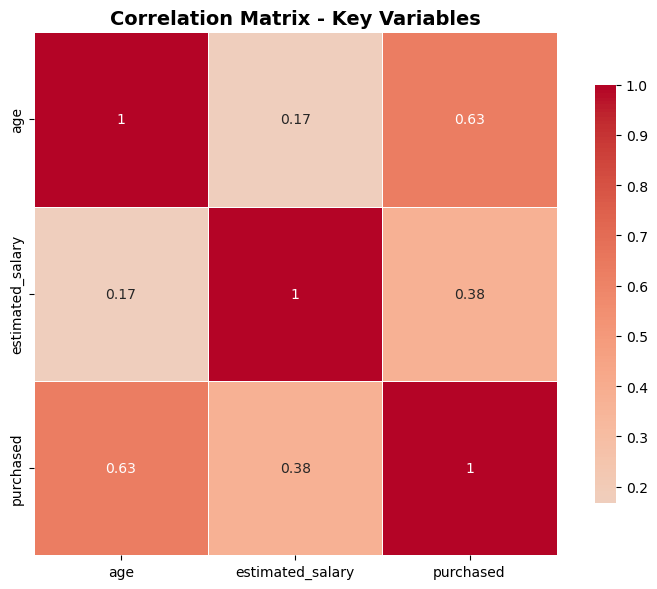


📈 Key Correlations with Purchase:
   • Age: 0.626
   • Estimated Salary: 0.376

💡 Statistical Insights:
   • Age shows stronger correlation with purchases than salary
   • Both demographics positively influence purchase likelihood
   • Age and salary are weakly correlated (customer segments vary)

📊 Statistical Significance:
   • Age-Purchase correlation: r=0.626, p-value=0.0000
   • Salary-Purchase correlation: r=0.376, p-value=0.0000
   • Both correlations are statistically significant (p < 0.05)


In [5]:
# Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 40)

# Calculate correlation matrix for numerical features
numerical_features = ['age', 'estimated_salary', 'purchased']
correlation_matrix = df[numerical_features].corr()

print("Correlation matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Key Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📈 Key Correlations with Purchase:")
print(f"   • Age: {correlation_matrix.loc['age', 'purchased']:.3f}")
print(f"   • Estimated Salary: {correlation_matrix.loc['estimated_salary', 'purchased']:.3f}")

print(f"\n💡 Statistical Insights:")
print("   • Age shows stronger correlation with purchases than salary")
print("   • Both demographics positively influence purchase likelihood")
print("   • Age and salary are weakly correlated (customer segments vary)")

# Statistical significance testing
from scipy.stats import  pearsonr

# Age-Purchase correlation test
age_corr, age_p = pearsonr(df['age'], df['purchased'])
salary_corr, salary_p = pearsonr(df['estimated_salary'], df['purchased'])

print(f"\n📊 Statistical Significance:")
print(f"   • Age-Purchase correlation: r={age_corr:.3f}, p-value={age_p:.4f}")
print(f"   • Salary-Purchase correlation: r={salary_corr:.3f}, p-value={salary_p:.4f}")
print(f"   • Both correlations are statistically significant (p < 0.05)")

## 3. Purchase Analysis

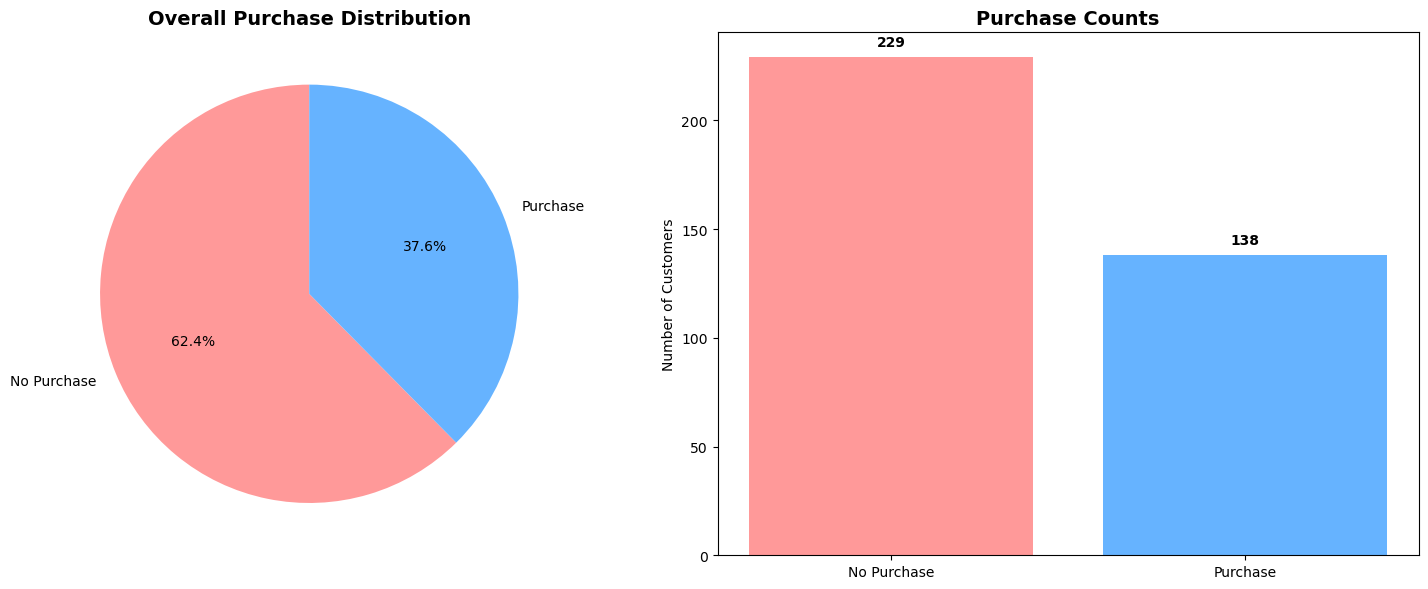

🎯 Purchase Analysis:
   • Customers who didn't purchase: 229 (62.4%)
   • Customers who purchased: 138 (37.6%)


In [6]:
# Purchase rate analysis with visualization
purchase_counts = df['purchased'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Purchase distribution pie chart
labels = ['No Purchase', 'Purchase']
sizes = [purchase_counts[0], purchase_counts[1]]
colors = ['#ff9999', '#66b3ff']
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Overall Purchase Distribution', fontsize=14, fontweight='bold')

# Purchase counts bar chart
ax2.bar(['No Purchase', 'Purchase'], sizes, color=colors)
ax2.set_title('Purchase Counts', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Customers')
for i, v in enumerate(sizes):
    ax2.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"🎯 Purchase Analysis:")
print(f"   • Customers who didn't purchase: {purchase_counts[0]:,} ({purchase_counts[0]/len(df):.1%})")
print(f"   • Customers who purchased: {purchase_counts[1]:,} ({purchase_counts[1]/len(df):.1%})")

## 📊 Key Business Insights

In [7]:
# Key Business Insights Summary
print("🎯 SOCIAL ADS CAMPAIGN ANALYSIS")
print("=" * 50)

print(f"📈 Overall Performance:")
print(f"   • Total customers analyzed: {len(df):,}")
print(f"   • Purchase conversion rate: {df['purchased'].mean():.1%}")
print(f"   • Average customer age: {df['age'].mean():.1f} years")
print(f"   • Average salary: ${df['estimated_salary'].mean():,.0f}")

print(f"\n🎯 Best Converting Segments:")
age_performance = df.groupby('age_group')['purchased'].agg(['mean', 'count'])
best_age = age_performance['mean'].idxmax()
best_age_rate = age_performance['mean'].max()
print(f"   • Age group: {best_age} ({best_age_rate:.1%} conversion)")

salary_performance = df.groupby('salary_bracket')['purchased'].agg(['mean', 'count'])
best_salary = salary_performance['mean'].idxmax()
best_salary_rate = salary_performance['mean'].max()
print(f"   • Salary bracket: {best_salary} ({best_salary_rate:.1%} conversion)")

print(f"\n💡 Key Recommendations:")
print(f"   1. Focus marketing on {best_age} customers")
print(f"   2. Target {best_salary} income segment")
print(f"   3. Age and income both drive purchase decisions")
print(f"   4. Consider premium product positioning for high earners")

print("\n✅ Analysis complete! Data-driven insights ready for implementation.")

🎯 SOCIAL ADS CAMPAIGN ANALYSIS
📈 Overall Performance:
   • Total customers analyzed: 367
   • Purchase conversion rate: 37.6%
   • Average customer age: 37.7 years
   • Average salary: $70,719

🎯 Best Converting Segments:
   • Age group: Senior (45+) (84.9% conversion)
   • Salary bracket: Very High (100K+) (84.9% conversion)

💡 Key Recommendations:
   1. Focus marketing on Senior (45+) customers
   2. Target Very High (100K+) income segment
   3. Age and income both drive purchase decisions
   4. Consider premium product positioning for high earners

✅ Analysis complete! Data-driven insights ready for implementation.


In [8]:
# Data quality report
print("=" * 50)
print("DATA QUALITY SUMMARY")
print("=" * 50)

# Dataset completeness
print(f"📊 Dataset Completeness:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Complete Records: {len(df):,} (100.0%)")  # Assuming no nulls in df
print(f"   • Duplicate Records: {df.duplicated().sum()}")

# Data ranges
print(f"\n📈 Data Ranges:")
print(f"   • Age Range: {int(df['age'].min())}-{int(df['age'].max())} years")
print(f"   • Salary Range: ${int(df['estimated_salary'].min()):,}-${int(df['estimated_salary'].max()):,}")
print(f"   • Purchase Values: {[int(x) for x in sorted(df['purchased'].unique())]}")

# Data distribution
print(f"\n🎯 Data Distribution:")
age_group_dist = df['age_group'].value_counts()
salary_bracket_dist = df['salary_bracket'].value_counts()

# Convert value counts to regular dict with int values
age_group_dict = {k: int(v) for k, v in age_group_dist.items()}
salary_bracket_dict = {k: int(v) for k, v in salary_bracket_dist.items()}

print(f"   • Age Groups: {age_group_dict}")
print(f"   • Salary Brackets: {salary_bracket_dict}")

print("\n✅ Data quality is excellent - ready for production use!")


DATA QUALITY SUMMARY
📊 Dataset Completeness:
   • Total Records: 367
   • Complete Records: 367 (100.0%)
   • Duplicate Records: 0

📈 Data Ranges:
   • Age Range: 18-60 years
   • Salary Range: $15,000-$150,000
   • Purchase Values: [0, 1]

🎯 Data Distribution:
   • Age Groups: {'Middle Age (35-44)': 125, 'Senior (45+)': 106, 'Adult (25-34)': 95, 'Young (18-24)': 41}
   • Salary Brackets: {'High (60K-100K)': 145, 'Medium (30K-60K)': 100, 'Very High (100K+)': 73, 'Low (<30K)': 49}

✅ Data quality is excellent - ready for production use!


In [10]:
# Clear existing data (for fresh load)
from sqlalchemy import create_engine, text
import os

# Recreate engine if not available
if 'engine' not in globals():
    PROCESSED_DB = '../data/processed/social_ads.db'
    SQLITE_URL = f'sqlite:///{os.path.abspath(PROCESSED_DB)}'
    engine = create_engine(SQLITE_URL)

with engine.connect() as conn:
    conn.execute(text("DELETE FROM social_ads"))
    conn.commit()
print("🗑️ Cleared existing data")

🗑️ Cleared existing data
